<a href="https://colab.research.google.com/github/Jumas-Cola/Neural_Networks_and_CV/blob/master/PyTorch_classification_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import torch
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

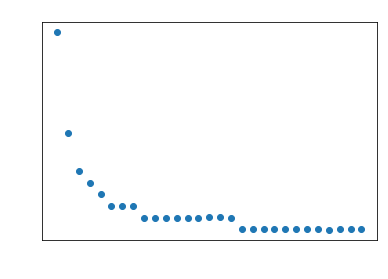

In [37]:
class WineNet(torch.nn.Module):
    def __init__(self,n_input, n_hidden_neurons):
        super(WineNet, self).__init__()
        self.fc1 = torch.nn.Linear(n_input, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid() # your code here
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid() # your code here
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

wine = load_wine()
features = 13 # use 13 features

accuracy_from_val = []

n_input = features # choose number of input neurons
n_hidden = 5 # choose number of hidden neurons
test_size = 0.03
# batch_size = 1000 # choose different batch sizes
epoches = 2000
import time

for batch_size in range(10, 300, 10):

  start_time = time.time()
  
  X_train, X_test, y_train, y_test = train_test_split(
      wine.data[:, :features],
      wine.target, 
      test_size=test_size,
      shuffle=True)

  X_train = torch.FloatTensor(X_train)
  X_test = torch.FloatTensor(X_test)
  y_train = torch.LongTensor(y_train)
  y_test = torch.LongTensor(y_test)

  wine_net = WineNet(n_input, n_hidden)

  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)

  for epoch in range(epoches):
      order = np.random.permutation(len(X_train))
      for start_index in range(0, len(X_train), batch_size):
          optimizer.zero_grad()
          
          batch_indexes = order[start_index:start_index+batch_size]
          
          x_batch = X_train[batch_indexes]
          y_batch = y_train[batch_indexes]
          
          preds = wine_net.forward(x_batch) 
          
          loss_value = loss(preds, y_batch)
          loss_value.backward()
          
          optimizer.step()
          
      if epoch % 10 == 0:
           test_preds = wine_net.forward(X_test)
           test_preds = test_preds.argmax(dim=1)
      #     print(np.asarray((test_preds == y_test).float().mean()))

  accuracy = np.asarray((test_preds == y_test).float().mean())
  accuracy_from_val.append((batch_size, time.time() - start_time))
  # print(wine_net.fc1.in_features, accuracy > 0.8, accuracy, n_hidden)
  # need to get 13 True

plt.tick_params(axis='x', colors='w')
plt.tick_params(axis='y', colors='w')
plt.xlabel('batch_size', c='w')
plt.ylabel('time', c='w')
plt.plot([i[0] for i in accuracy_from_val],
         [i[1] for i in accuracy_from_val], 'o')
plt.title('Accuracy from batch_size', c='w');
plt.show()